Adding library imports 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os
import glob
import skimage 
from skimage.io import imread 

In [3]:
#import shutil
path = "/Users/elizadoering/projects/AI/fruits-360/training/*/*"
files = []
[files.extend(glob.glob(path + '*.jpg'))]

images = [imread(file).astype(np.float32)/255.0 for file in files]

In [4]:
print(len(images))
labels = []
strawCount = 0
nonStraw = 0
for file in files:
    if 'Strawberry' in file or 'strawberry' in file:
        labels.append(1)
        strawCount += 1
    else:    
        labels.append(0)
        nonStraw += 1
print(strawCount)
print(nonStraw)

67692
1230
66462


In [5]:
from skimage.color import rgb2gray
new_Images = []
dim =100
for i in range(0,len(images)):
    original = images[i]
    grayscale = rgb2gray(original)
    new_Images.append(grayscale)
X = np.array(new_Images)
Y = np.array(labels)

In [6]:
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
#X = np.array(images)

x_reshape = X.reshape(67692,10000)
Y = np.array(labels)
X_train, X_test, Y_train, Y_test = train_test_split(x_reshape, Y, test_size = 0.2, random_state = 0)

In [7]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (54153, 10000)
X_test shape: (13539, 10000)


In [8]:
#naive bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

bayes = GaussianNB()
svm = SVC()
knn = KNeighborsClassifier()
classifiers = [bayes,svm,knn]

In [9]:
bayes.fit(X_train, Y_train, sample_weight=None)
svm.fit(X_train,Y_train)
#knn.fit(X_train,Y_train)
y_pred_bayes = bayes.predict(X_test)
y_pred_SVM = svm.predict(X_test)
#y_pred_KNN = knn.predict(X_test)

In [10]:
figure = plt.figure(figsize=(27, 9))
preds = [y_pred_bayes,y_pred_SVM]

<Figure size 1944x648 with 0 Axes>

In [11]:
from sklearn import metrics 
score_bayes = bayes.score(X_test, Y_test)
score_svm = svm.score(X_test,Y_test)
#score_knn = knn.score(X_test,Y_test)

In [12]:
print('Bayes score : ', score_bayes)
print('SVM score   : ', score_svm)
#print('KNN score   :', score_knn)

Bayes score :  0.7042617623162715
SVM score   :  0.9994091144102223


In [13]:
print('Bayes metrics report : \n',metrics.classification_report(Y_test, y_pred_bayes))
print('SVM metrics report   : \n',metrics.classification_report(Y_test, y_pred_SVM))

Bayes metrics report : 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82     13307
           1       0.05      0.95      0.10       232

    accuracy                           0.70     13539
   macro avg       0.53      0.82      0.46     13539
weighted avg       0.98      0.70      0.81     13539

SVM metrics report   : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13307
           1       1.00      0.97      0.98       232

    accuracy                           1.00     13539
   macro avg       1.00      0.98      0.99     13539
weighted avg       1.00      1.00      1.00     13539



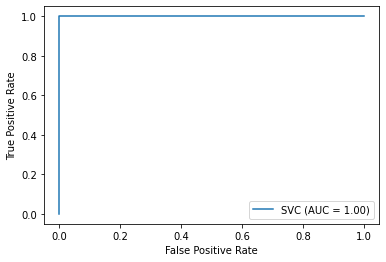

In [14]:
from sklearn.metrics import plot_roc_curve
svm_disp_roc = plot_roc_curve(svm, X_test, Y_test)
#bayes_disp_roc = plot_roc_curve(bayes, X_test, Y_test)

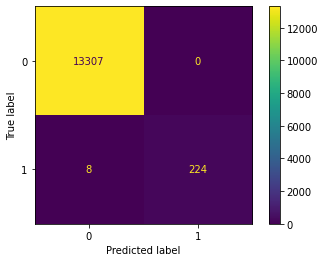

In [15]:
from sklearn.metrics import plot_confusion_matrix
svm_disp_matrix = plot_confusion_matrix(svm, X_test, Y_test)

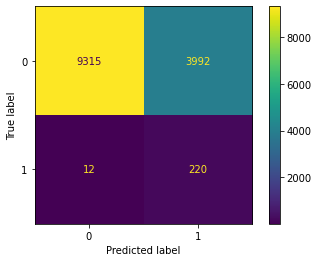

In [16]:
bayes_disp_matrix = plot_confusion_matrix(bayes,X_test,Y_test)

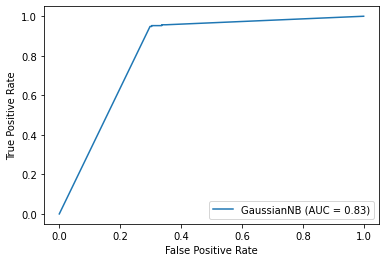

In [17]:
bayes_disp_roc = plot_roc_curve(bayes, X_test, Y_test)